## Pytorch Notebook on MNIST Dataset
### Objective of this Notebook : 
Main objective of this notebook is to use pytorch and predict the number from the MNIST dataset image. 

### MNIST Information
*   A collection of grayscale images of handwritten digits (0-9).
*   Each image is 28 pixels wide and 28 pixels high (28x28).
*   There are 60,000 training images and 10,000 test images.
*   Each image is labeled with the corresponding digit (0-9).

### Step 1 : Import All the necessary Library 

In [247]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid


import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2 : Create transform
- Convert MNIST Image Files into a Tensor of 4-Dimensions ((batch size of images, Height, Width, Color Channel))
- We will use later to convert the image into tensor

In [248]:
transform = transforms.ToTensor()

### Step 3 : Get the Train and Test Data 

In [249]:
# Train  Data  --> If the train data is not there it will donwload the data
train_Data = datasets.MNIST(root=r'MNIST', train=True, download=True, transform=transform)

# Test  Data   --> If the test data is not there it will download the data
test_Data = datasets.MNIST(root=r'MNIST', train=False, download=True, transform=transform)

In [250]:
# Check the training / testing data exist or not 
train_Data, test_Data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: MNIST
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: MNIST
     Split: Test
     StandardTransform
 Transform: ToTensor())

### Step 4 : Load Training Data and Testing data in batches

In [251]:
# Create a small batch size for images.... let's say 10  --> 60,000 image will be divide into 10 batches where each batch will have 6000 images
# With this method will load load the images in the set of 10 --> 10,000 image will be divide into 10 batches where each batch will have 1000 images

train_loader = DataLoader(train_Data, batch_size=10, shuffle=False)
test_loader = DataLoader(test_Data, batch_size=10, shuffle=False)

### Step 5 : Create Convolution Neural Neteork Model Class as per our need

In [252]:
#Model Class
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)     # Convoution Layer 1
        self.conv2 = nn.Conv2d(6, 16, 3, 1)    # Convolution Layer 2

        # Fully Connected layer
        self.fc1 = nn.Linear(5*5*16, 120)      # Fully Connected Layer 1 
        self.fc2 = nn.Linear(120, 84)          # Fully Connected Layer 2 
        self.fc3 = nn.Linear(84, 10)           # Fully Connected Layer 3 

    def forward(self,X):
        #First Pass
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)               # 2x2 kernal and strikde 2

        #Second Pass
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)              # 2x2 kernal and strikde 2

        #Re-view to flatenn i out 
        X = X.view(-1, 16*5*5)                 

        # Fully Connected layers
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)         # Return a single dimensional array 


### Step 6 : Feed the Manual Seet and Create a instance of our Convoution class

In [253]:
# Create an instance of our model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### Step 7 : Define the Loss Function and Optimizer

In [254]:
# Loss Function  and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.02) 

### Step 8 : Training

In [255]:
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []


# For loops of epochs
for i in range(epochs):
    trn_corr = 0
    test_corr = 0
    batch_corr = 0

    #Train 
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1 
        y_pred = model(X_train) 
        loss = criterion(y_pred, y_train)
        prdicted = torch.max(y_pred, 1)[1] 
        bach_corr = (prdicted == y_train).sum()
        trn_corr += batch_corr 
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%600 == 0:
            print(f"Epcoh {i} Batch {b},  Loss : {loss.item()}")
    

    train_losses.append(loss)
    train_correct.append(trn_corr)

    #Test , Remove teh gradient because we do not need to update teh weights and biases 
    with torch.no_grad(): 
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum() 
            loss = criterion(y_val, y_test)

        test_losses.append(loss)
        test_correct.append(test_corr)

current_time = time.time()
total = current_time-start_time
print(f"Training took : {total/60} minutes")

Epcoh 0 Batch 600,  Loss : 0.3953811526298523
Epcoh 0 Batch 1200,  Loss : 2.2983362674713135
Epcoh 0 Batch 1800,  Loss : 0.3525587320327759
Epcoh 0 Batch 2400,  Loss : 0.3160993158817291
Epcoh 0 Batch 3000,  Loss : 1.1719518899917603
Epcoh 0 Batch 3600,  Loss : 0.18183089792728424
Epcoh 0 Batch 4200,  Loss : 1.3788342475891113
Epcoh 0 Batch 4800,  Loss : 0.1993766725063324
Epcoh 0 Batch 5400,  Loss : 1.0632028579711914
Epcoh 0 Batch 6000,  Loss : 0.004598821513354778
Epcoh 1 Batch 600,  Loss : 0.29840993881225586
Epcoh 1 Batch 1200,  Loss : 0.5844177007675171
Epcoh 1 Batch 1800,  Loss : 0.24518613517284393
Epcoh 1 Batch 2400,  Loss : 0.2506410777568817
Epcoh 1 Batch 3000,  Loss : 0.23158955574035645
Epcoh 1 Batch 3600,  Loss : 0.48452964425086975
Epcoh 1 Batch 4200,  Loss : 1.013604760169983
Epcoh 1 Batch 4800,  Loss : 0.012272088788449764
Epcoh 1 Batch 5400,  Loss : 0.8106330633163452
Epcoh 1 Batch 6000,  Loss : 0.01768486760556698
Epcoh 2 Batch 600,  Loss : 0.14788086712360382
Epcoh 

### Optional : the number of capture training losses and test losses

In [256]:
print(f"Train losses: {len(train_losses)}, Test losses: {len(test_losses)}")
train_losses, test_losses

Train losses: 5, Test losses: 5


([tensor(0.0046, grad_fn=<NllLossBackward0>),
  tensor(0.0177, grad_fn=<NllLossBackward0>),
  tensor(0.0042, grad_fn=<NllLossBackward0>),
  tensor(0.3243, grad_fn=<NllLossBackward0>),
  tensor(0.0324, grad_fn=<NllLossBackward0>)],
 [tensor(0.0839),
  tensor(0.4629),
  tensor(0.4292),
  tensor(0.0374),
  tensor(0.2945)])

### Optional : Draw the Training and Validation loss

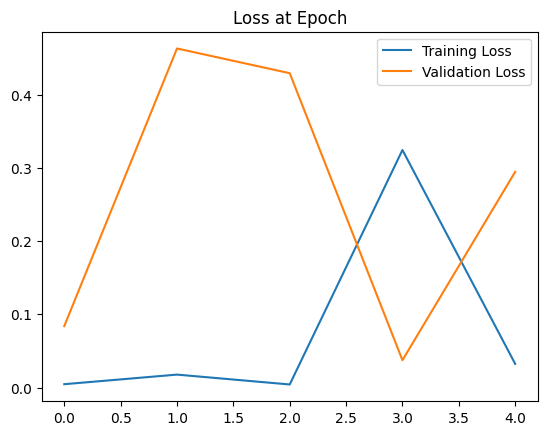

In [257]:
train_losses = [tl.item() for tl in train_losses]
test_losses = [tl.item() for tl in test_losses]

# Graph the loss at epoch
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

### Optional : Draw the Training and Validation Accuracy 

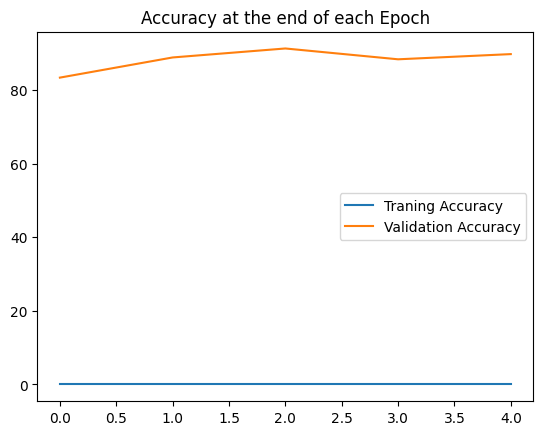

In [258]:
# Graph the accuracy at the end of the each epoch
plt.plot([t/600 for t in train_correct], label="Traning Accuracy")
plt.plot([t/100 for t in test_correct], label ="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()

### Optional : Check the how many correct result we get when we apply our CNN Model test data

In [259]:
## Load the test data 
test_load_everthing = DataLoader(test_Data, batch_size=100, shuffle=False)
with torch.no_grad():
	correct = 0
	for X_test, y_test in test_load_everthing:
		y_val = model(X_test)
		predicted = torch.max(y_val, 1)[1]
		correct += (predicted == y_test).sum()

correct.item()

8977

### Optional : Test our model with data and check manually by code only 

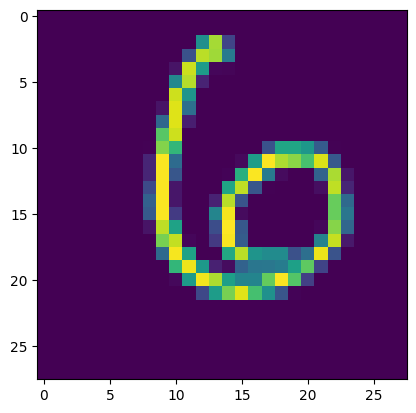

In [260]:
# Grab an image which is at index 100 in test_Data
    # This image will contain label but to test our model we do not need label so will modify
test_Data[100] 


# This way we will get tensor  without label
test_Data[100][0]


#Reshape it into 28 by 28 pixel size
test_Data[100][0].reshape(28, 28)

# Reshape the iamge and visualize 
    # If we visualize we no need to old step because to check the image we already reshape insideplt.imshow()
plt.imshow(test_Data[100][0].reshape(28, 28))

In [261]:
# As we already see at test_Data[100] have label 6 now we will predict with our trained model.
model.eval()
with torch.no_grad():
	new_prediction = model(test_Data[100][0].view(1, 1, 28, 28)) 

## This will give the bigged tensor amound the data
new_prediction.argmax()

tensor(6)